In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [98]:
df = pd.read_csv(r"C:\Users\Juliane\Documents\GitHub\labs_repo\LessonsW4\marketing_customer_analysis_clean.csv")

In [99]:
df.head(3)

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2


In [100]:
df.dtypes

unnamed:_0                         int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [101]:
dfnum = df.select_dtypes(include=['int64', 'float64'])
dfcat = df.select_dtypes(include=['object'])    

In [102]:
dfnum.dtypes

unnamed:_0                         int64
customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
total_claim_amount               float64
month                              int64
dtype: object

In [103]:
correlation_matrix = dfnum.corr().abs()

In [104]:
correlation_matrix

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,0.000593,0.004755
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,0.031501,0.016024,0.232626,0.009234
income,0.008910,0.028306,1.000000,0.009788,0.023126,0.005903,0.006956,0.009960,0.354141,0.000443
monthly_premium_auto,0.000863,0.403069,0.009788,1.000000,0.008504,0.018953,0.010066,0.020505,0.631799,0.007253
months_since_last_claim,0.007722,0.015683,0.023126,0.008504,1.000000,0.038155,0.002246,0.007425,0.012728,0.019359
months_since_policy_inception,0.012795,0.016960,0.005903,0.018953,0.038155,1.000000,0.004247,0.009123,0.003095,0.015163
number_of_open_complaints,0.007108,0.031501,0.006956,0.010066,0.002246,0.004247,1.000000,0.003964,0.011025,0.004671
number_of_policies,0.002319,0.016024,0.009960,0.020505,0.007425,0.009123,0.003964,1.000000,0.008923,0.005127
total_claim_amount,0.000593,0.232626,0.354141,0.631799,0.012728,0.003095,0.011025,0.008923,1.000000,0.001425
month,0.004755,0.009234,0.000443,0.007253,0.019359,0.015163,0.004671,0.005127,0.001425,1.000000


In [138]:
correlation_threshold = 0.7

# Identify highly correlated pairs
highly_correlated_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            highly_correlated_pairs.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Decide which columns to drop based on highly correlated pairs
columns_to_drop = set()
for col1, col2 in highly_correlated_pairs:
    columns_to_drop.add(col2)

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping highly correlated colum
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [105]:
dfcat.head(3)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A


In [106]:
dfcat_n = dfcat[['customer', 'response', 'employmentstatus', 'effective_to_date','state', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_type']]
dfcat_o = dfcat[['coverage', 'education', 'vehicle_class']]   

In [107]:
dfcat_n.head(3)

,customer,response,employmentstatus,effective_to_date,state,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_type
0,DK49336,No,Employed,2011-02-18,Arizona,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,A
1,KX64629,No,Unemployed,2011-01-18,California,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,A
2,LZ68649,No,Employed,2011-02-10,Washington,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,A


In [108]:
df_encoded = pd.get_dummies(dfcat_n, columns=['customer', 'response', 'employmentstatus', 'effective_to_date','state', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_type'])
df_encoded

,customer_AA10041,customer_AA11235,customer_AA16582,customer_AA30683,customer_AA34092,customer_AA35519,customer_AA56476,customer_AA69265,customer_AA71604,customer_AA93585,...,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_type_A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
10906,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
10907,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
10908,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [109]:
dfcat_o.nunique()

coverage         3
education        5
vehicle_class    6
dtype: int64

In [110]:
dfcat_o['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV'], dtype=object)

In [111]:
from sklearn.preprocessing import OrdinalEncoder

In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [113]:
dfcat_o.dropna(inplace=True)

C:\Users\Juliane\AppData\Local\Temp\ipykernel_15244\2890271633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcat_o.dropna(inplace=True)


In [114]:
dfcat_o.describe()

,coverage,education,vehicle_class
count,10910,10910,10910
unique,3,5,6
top,Basic,Bachelor,Four-Door Car
freq,6660,3272,5834


In [ ]:
# Create a DataFrame with a categorical ordinal column
coverage = {'coverage': ['Basic', 'Extended', 'Premium']}
df_coverage = pd.DataFrame(coverage)
education = {'education': ['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master']}
df_education = pd.DataFrame(education)
vehicle_class = {'vehicle_class': ['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car','Luxury SUV']}
df_vehicle_class = pd.DataFrame(vehicle_class)

# Define the ordinal categories for the column
oc_cov = ['Basic', 'Extended', 'Premium']
oc_ed = ['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master']
oc_vc = ['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car','Luxury SUV']

# Initialize the OrdinalEncoder
encoder_cov = OrdinalEncoder(categories=[oc_cov])
encoder_ed = OrdinalEncoder(categories=[oc_ed])
encoder_vc = OrdinalEncoder(categories=[oc_vc])

# Fit and transform the DataFrame
df['education'] = encoder.fit_transform(df[['education']])

# Display the DataFrame with the ordinal encoding
print(df)

CHALLENGE 2

1. varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a displot or a histogram

In [126]:
scaler = MinMaxScaler()
t_c_a = df['total_claim_amount']
t_c_a = t_c_a.values.reshape(-1,1)
tca_scaled = scaler.fit_transform(t_c_a)
df_scaled = pd.DataFrame(tca_scaled, columns=['total_claim_amount_scaled'])

In [141]:
df_scaled

,total_claim_amount_scaled
0,0.101171
1,0.257445
2,0.165875
3,0.167263
4,0.244657
...,...
10905,0.419717
10906,0.094333
10907,0.131763
10908,0.213674


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

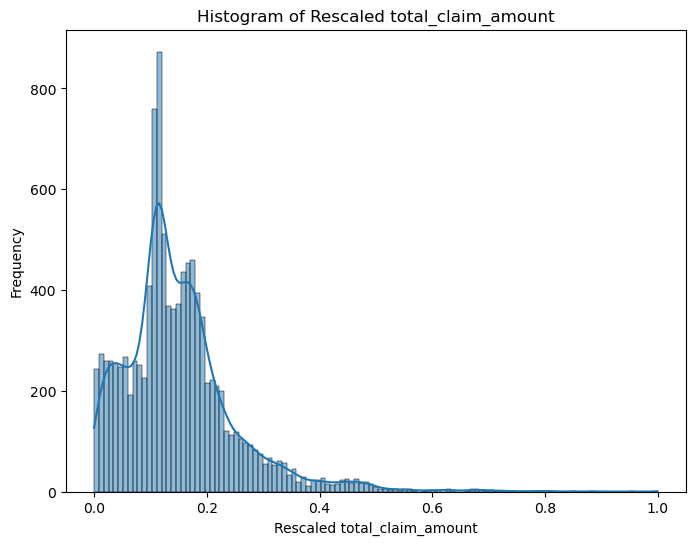

In [130]:
# Create a histogram to check the distribution of the rescaled variable
plt.figure(figsize=(8, 6))
sns.histplot(df_scaled['total_claim_amount_scaled'], kde=True)
plt.xlabel('Rescaled total_claim_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Rescaled total_claim_amount')
plt.show()

In [ ]:
CHALLENGE 2, 2.
varB
Use PowerTransformer to reduce its skew (StandardScaler is included!).
Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [133]:
from scipy.stats import skew
import pandas as pd


In [136]:
# Calculate skewness for each column
skewness = dfnum.apply(lambda x: skew(x))

# Find variables with noticeably large skew (e.g., skewness greater than 1 or less than -1)
variables_with_large_skew = skewness[abs(skewness) > 1]

# Display variables with noticeably large skew
print(variables_with_large_skew)


customer_lifetime_value      3.000635
monthly_premium_auto         2.116276
number_of_open_complaints    2.888365
number_of_policies           1.242403
total_claim_amount           1.729048
dtype: float64


In [142]:
# Initialize the PowerTransformer
pt = PowerTransformer()

# Fit and transform the DataFrame to reduce skewness
df_transformed = pt.fit_transform(dfnum)

# Create a new DataFrame with the transformed data
df_transformed = pd.DataFrame(df_transformed, columns=dfnum.columns)

# Display the DataFrame with the transformed data
df_transformed


,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,-2.191658,-0.336022,0.590530,-1.542363,-0.748204,0.226482,-0.575682,1.666474,-0.355784,1.068914
1,-2.188355,-1.866205,-1.634637,-1.256898,-1.331432,-0.712346,-0.575682,-1.148178,1.094634,-0.935529
2,-2.185524,1.290966,0.142576,0.629792,1.653714,-0.516527,-0.575682,-0.064771,0.333327,1.068914
3,-2.182962,1.729662,0.604438,0.536273,-0.389748,-1.843680,-0.575682,-0.064771,0.346350,-0.935529
4,-2.180582,0.645365,0.177735,1.051069,0.141568,-0.516527,1.252421,1.459269,0.998197,-0.935529
...,...,...,...,...,...,...,...,...,...,...
10905,1.552945,1.337872,-1.634637,2.153457,0.141568,-0.184818,1.252421,1.459269,2.145864,-0.935529
10906,1.553188,-0.183087,0.750719,-1.168860,-0.748204,0.735308,-0.575682,1.316039,-0.441090,-0.935529
10907,1.553431,1.797656,0.473529,1.942876,-0.279600,0.580350,-0.575682,-0.064771,-0.007367,1.068914
10908,1.553675,1.020789,0.784301,1.631253,-1.978804,-0.672400,1.933565,1.316039,0.752760,1.068914


In [144]:
df_transformed.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,1.091000e+04,1.091000e+04,1.091000e+04,1.091000e+04,1.091000e+04,1.091000e+04,1.091000e+04,1.091000e+04,1.091000e+04,1.091000e+04
mean,-1.250451e-16,-3.710974e-15,1.888702e-16,2.450089e-13,-8.596851e-17,-9.704021e-17,-2.621388e-17,-1.680294e-16,1.846369e-16,-1.395034e-15
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-2.191658e+00,-2.240385e+00,-1.634637e+00,-1.542363e+00,-1.978804e+00,-2.088645e+00,-5.756825e-01,-1.148178e+00,-2.832053e+00,-9.355292e-01
25%,-7.899485e-01,-6.595695e-01,-1.634637e+00,-9.236036e-01,-7.482038e-01,-7.935404e-01,-5.756825e-01,-1.148178e+00,-4.496157e-01,-9.355292e-01
50%,1.002424e-01,-2.936253e-02,3.757671e-01,-1.301795e-02,1.272765e-01,9.268690e-02,-5.756825e-01,-6.477091e-02,-2.747045e-03,-9.355292e-01
75%,8.632752e-01,6.403629e-01,7.630247e-01,8.729325e-01,8.306946e-01,8.267297e-01,1.252421e+00,8.779291e-01,5.442264e-01,1.068914e+00
max,1.553918e+00,2.805714e+00,1.111510e+00,2.265286e+00,1.722778e+00,1.633920e+00,1.935656e+00,1.666474e+00,4.718210e+00,1.068914e+00
